# Paso 1: Importacion de las librerias

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from tensorflow.keras.datasets import cifar10

tf.__version__

'2.2.0-rc2'

In [0]:
%matplotlib inline

# Paso 2: Preprocesado de datos

In [0]:
#configuracion del nombre de las clases
class_name = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [0]:
(x_train , y_train ), (x_test , y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


## Normalizar dataset

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
#noramlizamos elementos
import numpy as np
np.max(x_train)

255

In [0]:
x_train = x_train / 255
x_test = x_test / 255

(-0.5, 31.5, 31.5, -0.5)

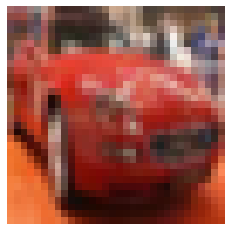

In [0]:
plt.imshow(x_train[5])
plt.axis('off')

In [0]:
y_train[5]

array([1], dtype=uint8)

# Paso 3: Contruir una Red Neuronal Convolucional

## Definir el modelo

In [0]:
model = tf.keras.Sequential()

### Añadir la primera capa de convolucion
Cada vez que hacemos una capa convulucional el numero de parametros disminuye muy significativamente. En este caso con un kernel de 3 se disminuye un noveno.
Hyper-Paramentros de la capa RNC:
  * Filtros = 32
  * tamaño del Kernel = 3
    * esto quiere decir que tendremos 3 puntos en horizontal y vertical
    * El kernel es lo que nos permite hacer la media, el producto convucional
    * esto es devido a la entrada
    * EL kernel es la matriz (en este caso 3 * 3, que va a realizar el analisis)
  * padding = same
    * Es algo bastante tipico, para que el filtro vaya pasando por todas las posiciones y tome el mismo valor.
    * Hay una diferencia entre usar el parametro `same` y `valid`
    * `same` crea 0 para analizar todos los elementos
    * `valid` solo los elementos validos
  * Funcion de activasion = relu
  * input shape = (32,32,3)

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32 , kernel_size= 3 , padding='same' , activation='relu' , input_shape=[32,32,3]))

## Añadir una segunda capa convolucional y la capa max-pooling
Es normal que luego de una primera capa convolucional se aplique una nueva, el hecho es que vamos a transformar la informacion de la primera imagen en otra informacion mucho mas simple.
Hyper Parametros:
  * Filtros: 32
  * Tamaño del kernel: 3
  * padding: same
  * funcion de activacion: relu

Hyper Parametros para max_pooling:
vamos a ultizarlo para extraer los rasgos mas significativos, pasa una matriz de `pool_size` y extrae el maximo.
  * pool_size : 2
  * strides: 2
    * Es un argumento que define el numero de pixeles que el kernel puede moverse en cualquier direccionanalizando la capa de entrada.
  * padding: valid
    * No interesa el same porque siempre voy a querer el maximo.

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32 , kernel_size= 3 , padding= 'same' , activation='relu'))
#por defecto no pongo el tamanio de entrada ya que toma el previamente calculado en la anterior capa

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2 , padding='valid'))

## Añadiendo la tercera Capa de Convolucion
* Exactamente igual que las anteriores con la diferencia de que aumentamos el numero de filtros al doble.
* Al obtener mas filtros vamos a intentar de esta forma obtener muchos mas rasgos que permitan clasificar la imagen.
* En este caso se esta aplicando mucho analisis en mucho menos pixeles (de esta forma convergera mucho mas rapido)

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64 , kernel_size= 3 ,padding='same' , activation='relu'))

## Añadiendo capa convoluciona + MaxPolling
Mismos parametros que antes

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size= 3 , padding='same' , activation='relu'))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2 , padding='valid'))

## Añadiendo Flattening
Capa de aplanamiento
* Basicamente, si contamos en este caso con una matriz 2x2 que contiene un Arreglo de 1x3, lo convierte en un solo vector undimensional.

In [0]:
model.add(tf.keras.layers.Flatten())

## Añadir la primera capa fully-connected
Lo anteriormente desarrollado basciamente se utiliza para convertir los datos de entrada en un formato mucho mas entendible para nuestra red neuronal.
* Tomamos el vector unidimensional creado y ahora trabajamos con los modelos que utilizamos con anterioridad.

Hyper-Parametros:
* Units : 128,
* Activation: `relu`

In [0]:
model.add(tf.keras.layers.Dense(units=1080 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

## Añadir capa de salida

In [0]:
model.add(tf.keras.layers.Dense(units=10 , activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

* Como podemos ver, aplicamos y calculamos para 32 posbiles rasgos y luego en base de eso le aplicamos un kernel para quedarnos con menos valores.
* El max-pooling divide por dos la cantidad de parametros que ingresan

# Paso 4: Validacion
## Compilar el Modelo
**sparse_categorical_accuracy**

sparse_categorical_accuracy comprueba si el valor verdadero maximal coincide con el índice maximal del valor de la predicción.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy

In [0]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['sparse_categorical_accuracy'])

## Entreamineto
* Se puede utilizar el parametro bach_side: que corrige un modelo cada cierta cantidad de elementos y no por cada paso

In [22]:
model.fit(x_train,y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 298s 191ms/step - loss: 1.3716 - sparse_categorical_accuracy: 0.4991
Epoch 2/15
1563/1563 [==============================] - 301s 192ms/step - loss: 0.9152 - sparse_categorical_accuracy: 0.6803
Epoch 3/15
1563/1563 [==============================] - 304s 194ms/step - loss: 0.7257 - sparse_categorical_accuracy: 0.7469
Epoch 4/15
1563/1563 [==============================] - 303s 194ms/step - loss: 0.5763 - sparse_categorical_accuracy: 0.8007
Epoch 5/15
1563/1563 [==============================] - 303s 194ms/step - loss: 0.4462 - sparse_categorical_accuracy: 0.8444
Epoch 6/15
1563/1563 [==============================] - 304s 195ms/step - loss: 0.3410 - sparse_categorical_accuracy: 0.8810
Epoch 7/15
1563/1563 [==============================] - 301s 192ms/step - loss: 0.2654 - sparse_categorical_accuracy: 0.9072
Epoch 8/15
1563/1563 [==============================] - 300s 192ms/step - loss: 0.2144 - sparse_categorical_accuracy: 0.9253


In [23]:
test_loss , test_accuracy = model.evaluate(x_test , y_test)
print('Presicion: ', test_accuracy)

313/313 [==============================] - 15s 50ms/step - loss: 1.2090 - sparse_categorical_accuracy: 0.7602
Presicion:  0.760200023651123


## Conclusiones:
* Una particulearidad que tiene este modelo es que se nota una clara mejoria en el trabajo de los elementos.
* Se deberia de plotear la mejor en cada una de las epocas comparada con las redes neuronales normales